In [2]:
import sys  
sys.path.insert(0, '/Users/franci/MasterThesis/multiomics-perturbation/new_model')

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Loss values

Compare loss values of SCVI RNA, TOTALVI and MMVAE for all three training scenarios

## Training scenario 1

## Protein correlations

In [37]:
from src_trainer.plotting import boxplot_grouped_corr, average_corr_mean_condition
import seaborn as sns

sample_dist_list = ["posterior", "prior", "transfer"]
col_conds = [{'PG': 'LD', 'ADJ': 'medium', 'CT': None}, 
             {'PG': 'DK', 'ADJ': 'medium', 'CT': None},
             {'PG': 'RT', 'ADJ': 'medium', 'CT': None},
             {'PG': 'LD', 'ADJ': 'PI', 'CT': None},
             {'PG': 'DK', 'ADJ': 'PI', 'CT': None},
             {'PG': 'RT', 'ADJ': 'PI', 'CT': None}]

folder_name = 'csv_1_protein'

def average_corr_mean(folder, model_type, model_name, sample_dist_list, score = "corr_mean", modality="protein"):
    """
    Calculates average correlation mean per sample distribution 
    :param filename: 
    :return: 
    """
    for sample_dist in sample_dist_list:
        df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format(folder, model_type, model_name, sample_dist, modality))
        avg = np.mean(df[score])
        print("Average for {}: {}".format(sample_dist, np.round(avg,2)))
        
def std_corr_mean(folder, model_type, model_name, sample_dist_list, score = "corr_mean", modality="protein"):
    """
    Calculates average correlation mean per sample distribution 
    :param filename: 
    :return: 
    """
    for sample_dist in sample_dist_list:
        df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format(folder, model_type, model_name, sample_dist, modality))
        std = np.std(df[score])
        print("Std for {}: {}".format(sample_dist, np.round(std,2)))
        

def all_boxplot_posterior_PS(cat_cov_model_dict, modality, label_models, score, title, y_label, jitter = False, legend = True, y_lim = [0, 1]):
    data_list = []
    for cat_cov, model_dict in cat_cov_model_dict.items():
        print(model_dict)
        for i, (model_type, model_name) in enumerate(model_dict.items()):
            df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format('csv_1_protein', model_type, model_name, 'posterior', modality))
            idx_list = []
            df["CAT_COV"] = cat_cov
            df["model type"] = label_models[i]
            data_list.append(df[["CAT_COV", score, "model type"]])
            
    dataframe = pd.concat(data_list)

    my_colors = sns.color_palette("colorblind", 3)[2:]
    sns.set(font_scale=2)
    sns.set_palette( my_colors )
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(10,10))
    ax = sns.boxplot(y=score, x='CAT_COV',
                data=dataframe,
                palette=my_colors,
                hue='model type')
    if jitter:
        ax = sns.swarmplot(y=score, x='CAT_COV',
                data=dataframe,
                color = "grey",
                hue='model type')
    ax.set_ylim(y_lim) 
    ax.set_xlabel("Categorical covariates")
    ax.set_ylabel(y_label)
    #plt.title(title)
    if legend:
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else: 
        ax.legend_.remove()
    plt.show()
    

def boxplot_posterior_PS(model_type_dict, modality, label_models, score, title):
    labels = []
    data_list = []
    for i, (model_type, model_name) in enumerate(model_type_dict.items()):
        df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format('csv_1_protein', model_type, model_name, 'posterior', modality))
        idx_list = []
        labels.append(label_models[i])
        data_list.append(df[score])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(data_list, labels=labels)
    plt.title(title)
    plt.show()
    
label_models = ['totalVI', 'cellPMVI']

## Training scenario 1

### Categorical covariates: PG, ADJ, CT

In [3]:
model_type_dict = {
                   "TOTALVI": "20220608-104642", 
                   "MMVAE": "20220608-162535",
                   #"MMVAE_lp": "20220608-200506",
                  #"MMVI_CITESEQ": "20220603-125622"
                  }

Correlation mean


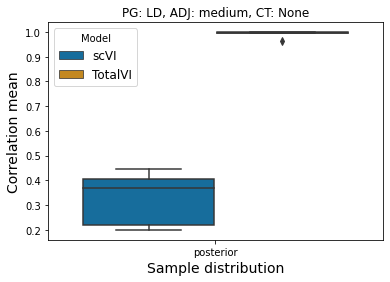

Correlation variance


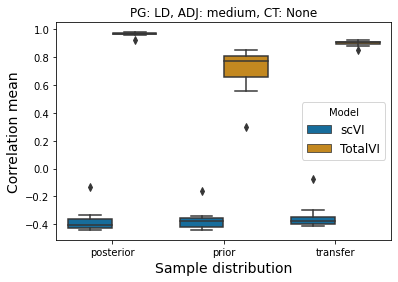

Correlation mean


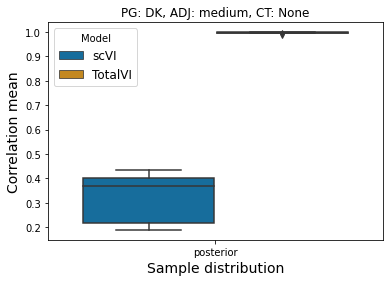

Correlation variance


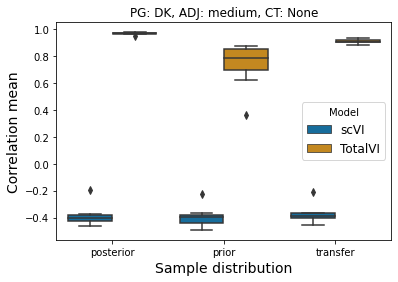

Correlation mean


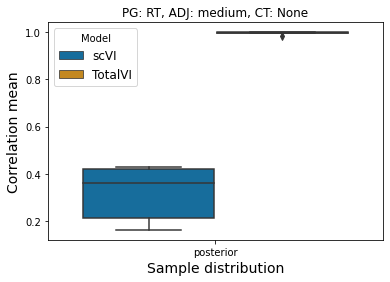

Correlation variance


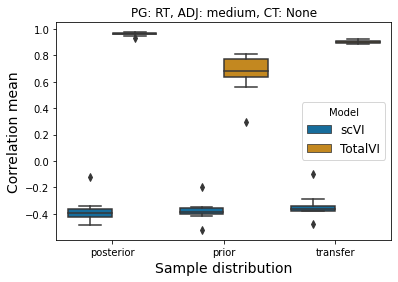

Correlation mean


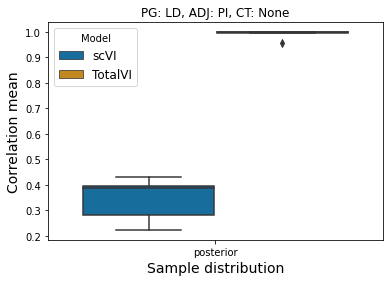

Correlation variance


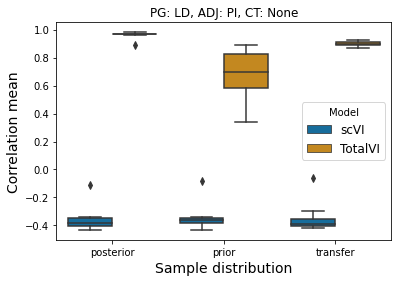

Correlation mean


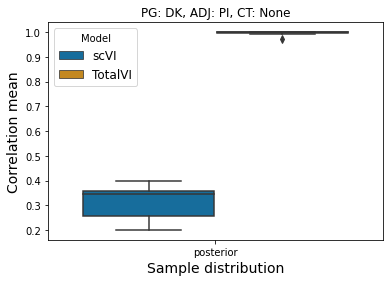

Correlation variance


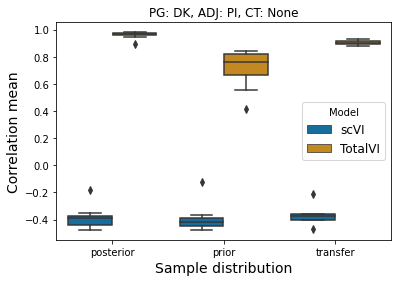

Correlation mean


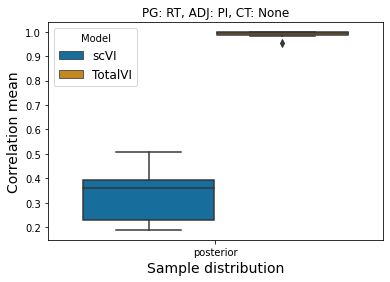

Correlation variance


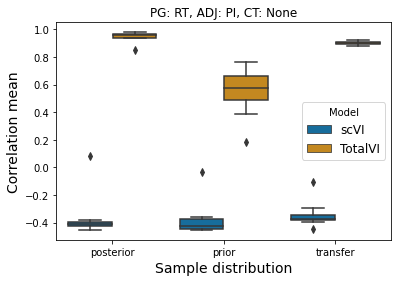

In [4]:
for d in col_conds:
    print("Correlation mean")
    boxplot_grouped_corr(model_type_dict,
                         ['posterior'],
                         d,
                         score="corr_mean",
                         folder = "csv_1_protein",
                        modality="protein")
    print("Correlation variance")
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_var",
                         folder = "csv_1_protein",
                        modality="protein")
    

In [5]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    results = average_corr_mean_condition("csv_1_protein", 
                                        model_type, 
                                        model_name, 
                                        sample_dist_list, 
                                        condition='ADJ',
                                        score = "corr_mean", 
                                        modality="protein")
    print(results)
    results = average_corr_mean_condition("csv_1_protein", 
                                        model_type, 
                                        model_name, 
                                        sample_dist_list, 
                                        condition='PG',
                                        score = "corr_mean", 
                                        modality="protein")
    print(results)
    results = average_corr_mean_condition("csv_1_protein", 
                                        model_type, 
                                        model_name, 
                                        sample_dist_list, 
                                        condition='CT',
                                        score = "corr_mean", 
                                        modality="protein")
    print(results)

TOTALVI
   posterior  prior  transfer Condition
0       0.33   0.33      0.33        PI
1       0.32   0.33      0.33    medium
   posterior  prior  transfer Condition
0       0.32   0.33      0.33        DK
1       0.34   0.34      0.34        LD
2       0.33   0.32      0.33        RT
   posterior  prior  transfer Condition
0       0.20   0.20      0.20         B
1       0.42   0.42      0.44      CD4T
2       0.40   0.40      0.42      CD8T
3       0.23   0.23      0.22        DC
4       0.23   0.23      0.20  Monocyte
5       0.40   0.40      0.39        NK
6       0.36   0.36      0.37    OtherT
7       0.40   0.39      0.39  Platelet
MMVAE
   posterior  prior  transfer Condition
0       0.99   0.69      0.94        PI
1       1.00   0.75      0.94    medium
   posterior  prior  transfer Condition
0       1.00   0.77      0.95        DK
1       0.99   0.74      0.94        LD
2       0.99   0.65      0.94        RT
   posterior  prior  transfer Condition
0       1.00   0.75      0

In [6]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    print("corr_mean")
    average_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_mean")
    print("corr_var")
    average_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_var")

TOTALVI
corr_mean
Average for posterior: 0.33
Average for prior: 0.33
Average for transfer: 0.33
corr_var
Average for posterior: -0.37
Average for prior: -0.37
Average for transfer: -0.35
MMVAE
corr_mean
Average for posterior: 0.99
Average for prior: 0.72
Average for transfer: 0.94
corr_var
Average for posterior: 0.96
Average for prior: 0.67
Average for transfer: 0.9


In [7]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    print("corr_mean")
    std_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_mean")
    print("corr_var")
    std_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_var")


TOTALVI
corr_mean
Std for posterior: 0.09
Std for prior: 0.09
Std for transfer: 0.1
corr_var
Std for posterior: 0.11
Std for prior: 0.1
Std for transfer: 0.09
MMVAE
corr_mean
Std for posterior: 0.01
Std for prior: 0.19
Std for transfer: 0.01
corr_var
Std for posterior: 0.03
Std for prior: 0.18
Std for transfer: 0.02


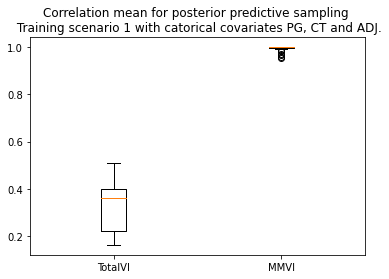

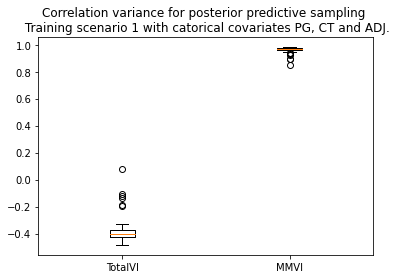

In [8]:
# boxplot for correlation mean and variance 
label_models = ['TotalVI', 'MMVI']


title = 'Correlation mean for posterior predictive sampling \n Training scenario 1 with catorical covariates PG, CT and ADJ.'
boxplot_posterior_PS(model_type_dict, 'protein', label_models, 'corr_mean', title)
title = 'Correlation variance for posterior predictive sampling \n Training scenario 1 with catorical covariates PG, CT and ADJ.'
boxplot_posterior_PS(model_type_dict, 'protein', label_models, 'corr_var', title)

### Categorical covariates: PG, CT

In [9]:
model_type_dict = {
                    "TOTALVI": "20220608-211318", 
                   "MMVAE": "20220610-121219"
                  }
folder_name = "csv_1_protein"

All genes


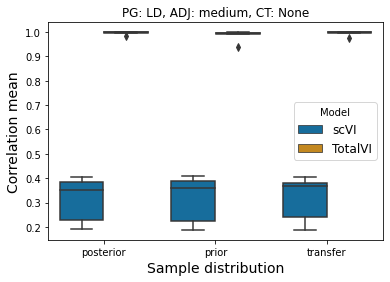

DE genes


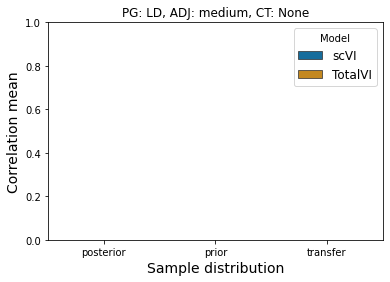

All genes


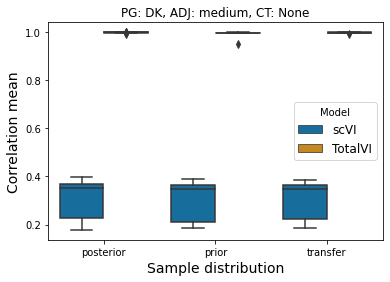

DE genes


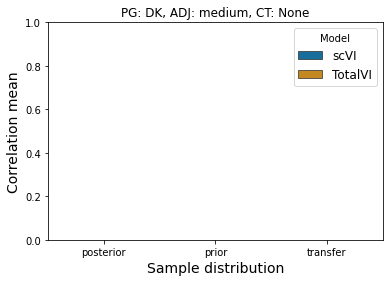

All genes


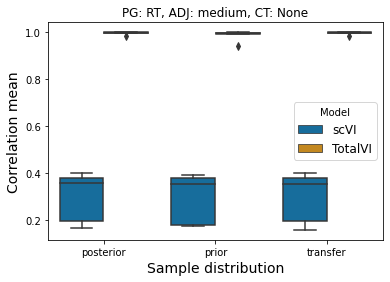

DE genes


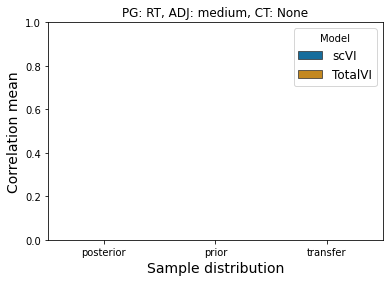

All genes


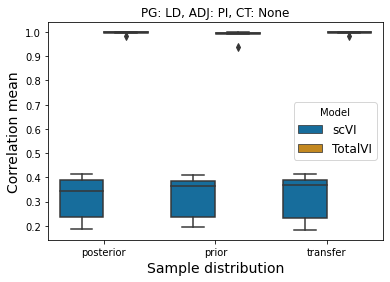

DE genes


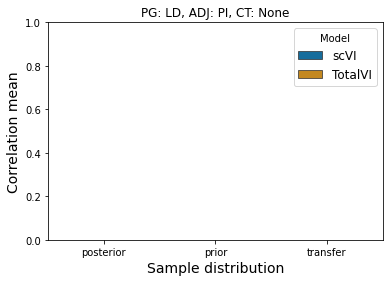

All genes


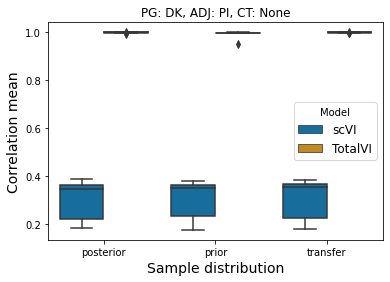

DE genes


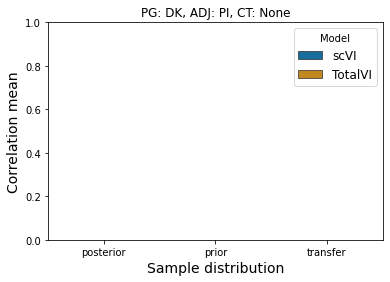

All genes


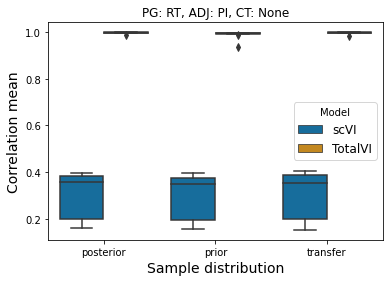

DE genes


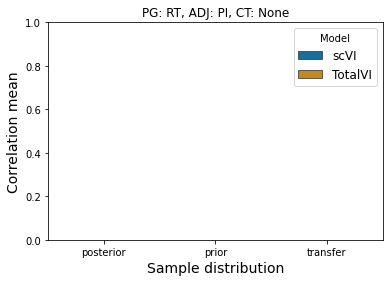

In [10]:
for d in col_conds:
    print("All genes")
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean",
                         folder = folder_name,
                        modality='protein')
    print("DE genes")
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean_DE",
                         folder = folder_name,
                        modality='protein')
    

In [11]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    print("corr_mean")
    average_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_mean")
    print("corr_var")
    average_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_var")


TOTALVI
corr_mean
Average for posterior: 0.31
Average for prior: 0.31
Average for transfer: 0.31
corr_var
Average for posterior: -0.41
Average for prior: -0.42
Average for transfer: -0.41
MMVAE
corr_mean
Average for posterior: 1.0
Average for prior: 0.99
Average for transfer: 1.0
corr_var
Average for posterior: 0.96
Average for prior: 0.94
Average for transfer: 0.96


In [12]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    print("corr_mean")
    std_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_mean")
    print("corr_var")
    std_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_var")


TOTALVI
corr_mean
Std for posterior: 0.09
Std for prior: 0.09
Std for transfer: 0.09
corr_var
Std for posterior: 0.09
Std for prior: 0.1
Std for transfer: 0.1
MMVAE
corr_mean
Std for posterior: 0.0
Std for prior: 0.02
Std for transfer: 0.0
corr_var
Std for posterior: 0.01
Std for prior: 0.04
Std for transfer: 0.01


In [13]:
for cond in ['PG', 'CT']:
    results_dict = {}
    print(cond)
    for model_type, model_name in model_type_dict.items():
        print(model_type)
        results = average_corr_mean_condition("csv_1_protein", 
                                            model_type, 
                                            model_name, 
                                            ['posterior', 'prior', 'transfer'],  
                                            condition=cond,
                                            score = "corr_mean", 
                                            modality="protein")
        print(results)

PG
TOTALVI
   posterior  prior  transfer Condition
0       0.31   0.30      0.31        DK
1       0.32   0.32      0.32        LD
2       0.30   0.30      0.30        RT
MMVAE
   posterior  prior  transfer Condition
0        1.0   0.99       1.0        DK
1        1.0   0.99       1.0        LD
2        1.0   0.99       1.0        RT
CT
TOTALVI
   posterior  prior  transfer Condition
0       0.18   0.18      0.19         B
1       0.39   0.39      0.39      CD4T
2       0.38   0.38      0.38      CD8T
3       0.22   0.22      0.23        DC
4       0.20   0.20      0.19  Monocyte
5       0.38   0.37      0.38        NK
6       0.35   0.34      0.35    OtherT
7       0.37   0.38      0.38  Platelet
MMVAE
   posterior  prior  transfer Condition
0       1.00   1.00      1.00         B
1       1.00   1.00      1.00      CD4T
2       1.00   1.00      1.00      CD8T
3       1.00   0.99      1.00        DC
4       1.00   1.00      1.00  Monocyte
5       1.00   1.00      1.00        NK
6     

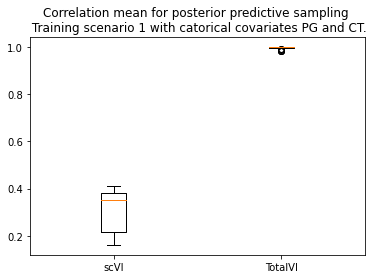

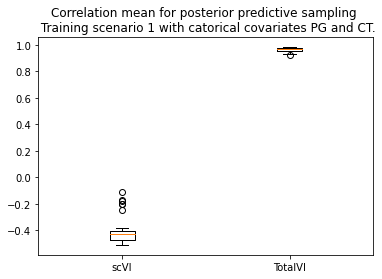

In [14]:
# boxplot for correlation mean and variance 
label_models = ['scVI', 'TotalVI', 'MMVI']


title = 'Correlation mean for posterior predictive sampling \n Training scenario 1 with catorical covariates PG and CT.'
boxplot_posterior_PS(model_type_dict, 'protein', label_models, 'corr_mean', title)

title = 'Correlation mean for posterior predictive sampling \n Training scenario 1 with catorical covariates PG and CT.'
boxplot_posterior_PS(model_type_dict, 'protein', label_models, 'corr_var', title)

### Categorical covariates: PG, ADJ

In [15]:
model_type_dict = {
                    "TOTALVI": "20220608-211318", 
                   "MMVAE": "20220610-131050"
                  }
folder_name = "csv_1_protein"

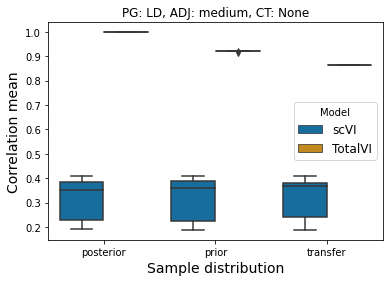

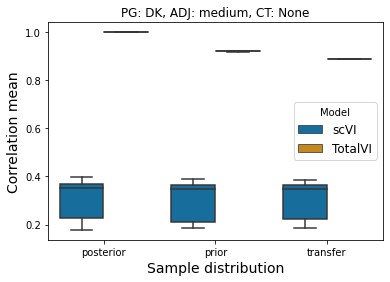

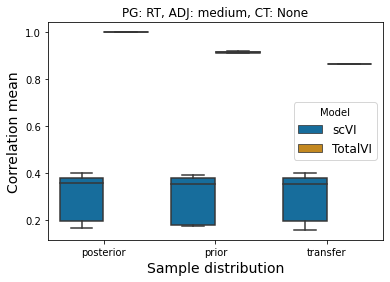

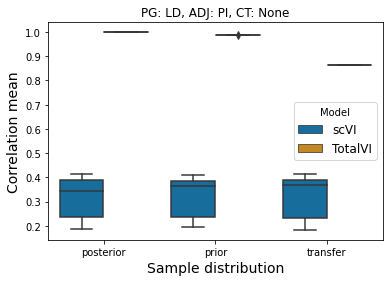

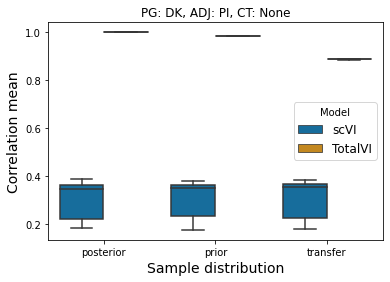

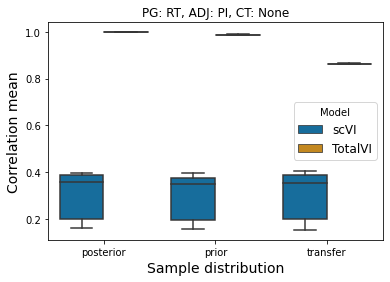

In [17]:
for d in col_conds:
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean",
                         folder = folder_name,
                        modality='protein')
    

In [18]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    average_corr_mean(folder_name, model_type, model_name, sample_dist_list, score = "corr_mean")
    print("corr_var")
    average_corr_mean(folder_name, model_type, model_name, sample_dist_list, score = "corr_var")

TOTALVI
Average for posterior: 0.31
Average for prior: 0.31
Average for transfer: 0.31
corr_var
Average for posterior: -0.41
Average for prior: -0.42
Average for transfer: -0.41
MMVAE
Average for posterior: 1.0
Average for prior: 0.95
Average for transfer: 0.87
corr_var
Average for posterior: 0.96
Average for prior: 0.87
Average for transfer: 0.81


In [19]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    print("corr_mean")
    std_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_mean")
    print("corr_var")
    std_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_var")


TOTALVI
corr_mean
Std for posterior: 0.09
Std for prior: 0.09
Std for transfer: 0.09
corr_var
Std for posterior: 0.09
Std for prior: 0.1
Std for transfer: 0.1
MMVAE
corr_mean
Std for posterior: 0.0
Std for prior: 0.03
Std for transfer: 0.01
corr_var
Std for posterior: 0.0
Std for prior: 0.06
Std for transfer: 0.01


In [20]:
for cond in ['PG', 'ADJ']:
    results_dict = {}
    print(cond)
    for model_type, model_name in model_type_dict.items():
        print(model_type)
        results = average_corr_mean_condition("csv_1_protein", 
                                            model_type, 
                                            model_name, 
                                            ['posterior', 'prior', 'transfer'],  
                                            condition=cond,
                                            score = "corr_mean", 
                                            modality="protein")
        print(results)

PG
TOTALVI
   posterior  prior  transfer Condition
0       0.31   0.30      0.31        DK
1       0.32   0.32      0.32        LD
2       0.30   0.30      0.30        RT
MMVAE
   posterior  prior  transfer Condition
0        1.0   0.95      0.89        DK
1        1.0   0.95      0.86        LD
2        1.0   0.95      0.86        RT
ADJ
TOTALVI
   posterior  prior  transfer Condition
0       0.31   0.31      0.31        PI
1       0.31   0.31      0.31    medium
MMVAE
   posterior  prior  transfer Condition
0        1.0   0.99      0.87        PI
1        1.0   0.92      0.87    medium


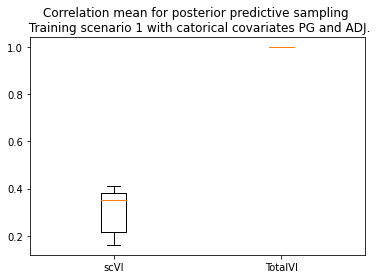

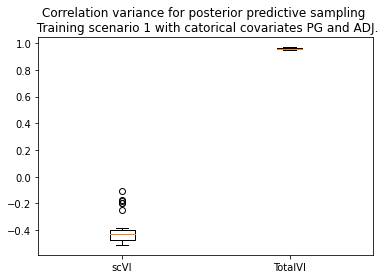

In [21]:
# boxplot for correlation mean and variance 
label_models = ['scVI', 'TotalVI', 'MMVI']


title = 'Correlation mean for posterior predictive sampling \n Training scenario 1 with catorical covariates PG and ADJ.'
boxplot_posterior_PS(model_type_dict, 'protein', label_models, 'corr_mean', title)

title = 'Correlation variance for posterior predictive sampling \n Training scenario 1 with catorical covariates PG and ADJ.'
boxplot_posterior_PS(model_type_dict, 'protein', label_models, 'corr_var', title)

### Categorical covariates: CT, ADJ

In [22]:
model_type_dict = {
                   "TOTALVI": "20220608-220008", 
                   "MMVAE": "20220610-141006"
                  }

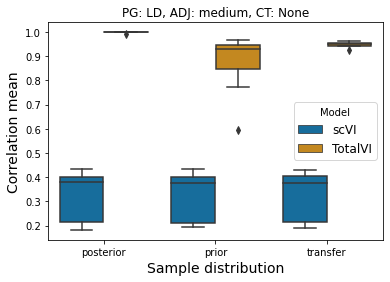

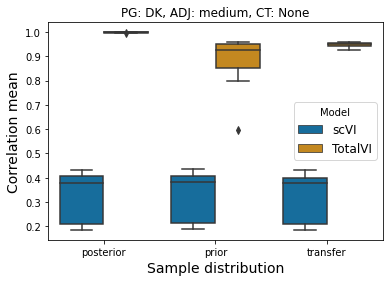

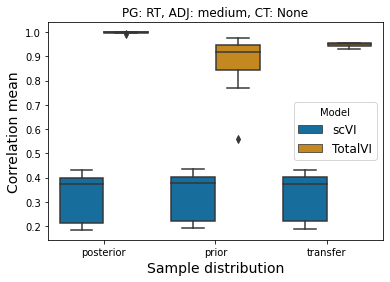

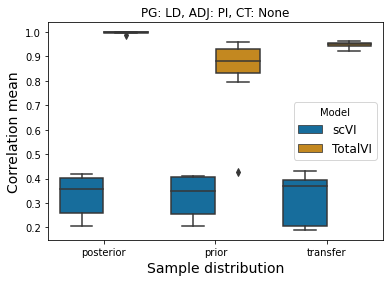

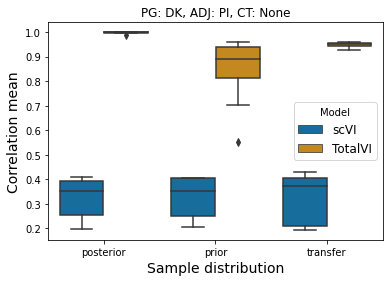

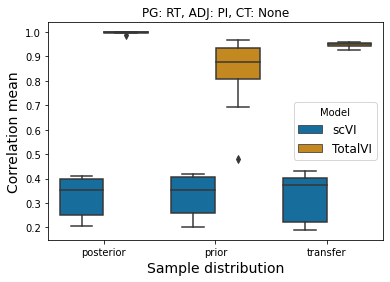

In [23]:
for d in col_conds:
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean",
                         folder = folder_name,
                        modality='protein')
    

In [24]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    average_corr_mean(folder_name, model_type, model_name, sample_dist_list, score = "corr_mean")
    print("corr_var")
    average_corr_mean(folder_name, model_type, model_name, sample_dist_list, score = "corr_var")

TOTALVI
Average for posterior: 0.33
Average for prior: 0.33
Average for transfer: 0.32
corr_var
Average for posterior: -0.41
Average for prior: -0.41
Average for transfer: -0.39
MMVAE
Average for posterior: 1.0
Average for prior: 0.85
Average for transfer: 0.95
corr_var
Average for posterior: 0.96
Average for prior: 0.78
Average for transfer: 0.91


In [25]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    print("corr_mean")
    std_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_mean")
    print("corr_var")
    std_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_var")


TOTALVI
corr_mean
Std for posterior: 0.09
Std for prior: 0.09
Std for transfer: 0.1
corr_var
Std for posterior: 0.09
Std for prior: 0.09
Std for transfer: 0.08
MMVAE
corr_mean
Std for posterior: 0.0
Std for prior: 0.14
Std for transfer: 0.01
corr_var
Std for posterior: 0.01
Std for prior: 0.13
Std for transfer: 0.01


In [26]:
for cond in ['ADJ', 'CT']:
    results_dict = {}
    print(cond)
    for model_type, model_name in model_type_dict.items():
        print(model_type)
        results = average_corr_mean_condition("csv_1_protein", 
                                            model_type, 
                                            model_name, 
                                            ['posterior', 'prior', 'transfer'],  
                                            condition=cond,
                                            score = "corr_mean", 
                                            modality="protein")
        print(results)

ADJ
TOTALVI
   posterior  prior  transfer Condition
0       0.33   0.33      0.32        PI
1       0.32   0.33      0.32    medium
MMVAE
   posterior  prior  transfer Condition
0        1.0   0.83      0.95        PI
1        1.0   0.87      0.95    medium
CT
TOTALVI
   posterior  prior  transfer Condition
0       0.19   0.20      0.19         B
1       0.42   0.42      0.43      CD4T
2       0.39   0.38      0.41      CD8T
3       0.23   0.23      0.22        DC
4       0.23   0.23      0.19  Monocyte
5       0.40   0.40      0.39        NK
6       0.35   0.35      0.36    OtherT
7       0.40   0.40      0.39  Platelet
MMVAE
   posterior  prior  transfer Condition
0       1.00   0.87      0.95         B
1       1.00   0.96      0.95      CD4T
2       1.00   0.95      0.95      CD8T
3       1.00   0.75      0.96        DC
4       1.00   0.92      0.94  Monocyte
5       1.00   0.92      0.93        NK
6       1.00   0.90      0.94    OtherT
7       0.99   0.53      0.96  Platelet


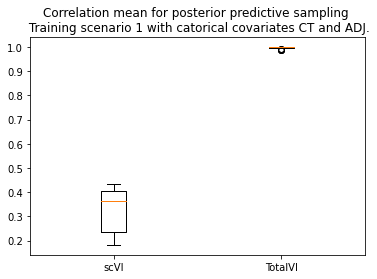

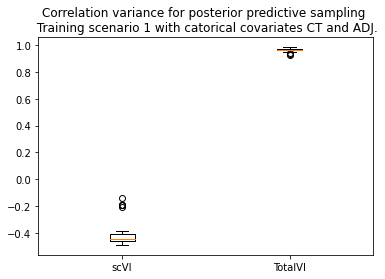

In [27]:
# boxplot for correlation mean and variance 
label_models = ['scVI', 'TotalVI', 'MMVI']


title = 'Correlation mean for posterior predictive sampling \n Training scenario 1 with catorical covariates CT and ADJ.'
boxplot_posterior_PS(model_type_dict, 'protein', label_models, 'corr_mean', title)

title = 'Correlation variance for posterior predictive sampling \n Training scenario 1 with catorical covariates CT and ADJ.'
boxplot_posterior_PS(model_type_dict, 'protein', label_models, 'corr_var', title)

## Posterior predictive sampling performance

In [7]:
MMVI_cat_cov_model_dict = {'population, \n adjuvant, \n cell type': {
                                   "MMVAE": "20220608-162535"
                                   },
                      'population, \n cell type': {
                                "MMVAE": "20220610-121219"
                                },
                      'population, \n adjuvant': {
                                 "MMVAE": "20220610-131050"
                                  },
                      'adjuvant, \n cell type': {
                                 "MMVAE": "20220610-141006"}
                    }

In [5]:
complete_cat_cov_model_dict = {'population, \n adjuvant, \n cell type': {
                                   "TOTALVI": "20220608-104642", 
                                   "MMVAE": "20220608-162535"
                                   },
                      'population, \n cell type': {
                                "TOTALVI": "20220608-211318", 
                                "MMVAE": "20220610-121219"
                                },
                      'population, \n adjuvant': {
                                 "TOTALVI": "20220608-213657", 
                                 "MMVAE": "20220610-131050"
                                  },
                      'adjuvant, \n cell type': {
                                 "TOTALVI": "20220608-220008", 
                                 "MMVAE": "20220610-141006"}
                    }

In [ ]:
cat_cov_model_dict = {'PG_ADJ_CT': {
                                   "TOTALVI": "20220608-104642", 
                                   "MMVAE": "20220608-162535"
                                   },
                      'PG_CT': { 
                                "TOTALVI": "20220608-211318", 
                                "MMVAE": "20220610-121219"
                                },
                      'PG_ADJ': { 
                                 "TOTALVI": "20220608-20220608-213657", 
                                 "MMVAE": "20220610-131050"
                                  }
                    }


{'TOTALVI': '20220608-104642', 'MMVAE': '20220608-162535'}
{'TOTALVI': '20220608-211318', 'MMVAE': '20220610-121219'}
{'TOTALVI': '20220608-213657', 'MMVAE': '20220610-131050'}
{'TOTALVI': '20220608-220008', 'MMVAE': '20220610-141006'}


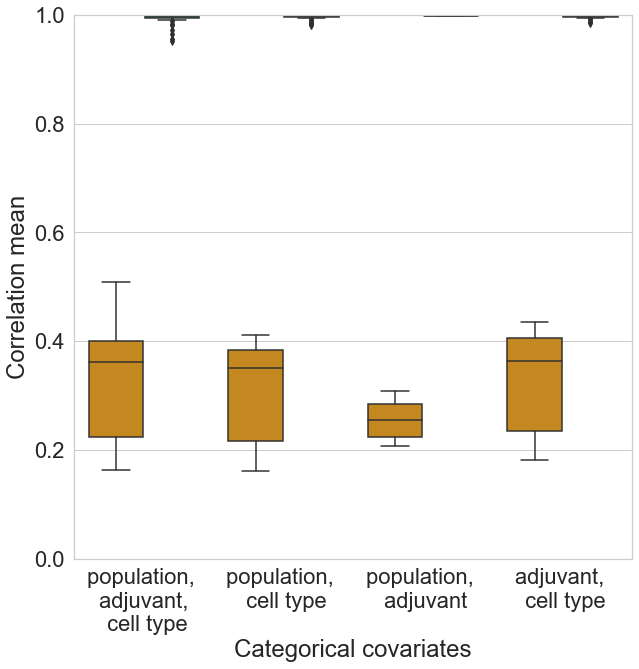

In [31]:
title = 'Training scenario 1 \n Correlation mean of posterior predictive sampling'
all_boxplot_posterior_PS(complete_cat_cov_model_dict, 'protein', label_models, 'corr_mean', title, y_label = "Correlation mean", legend = False)

{'MMVAE': '20220608-162535'}
{'MMVAE': '20220610-121219'}
{'MMVAE': '20220610-131050'}
{'MMVAE': '20220610-141006'}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


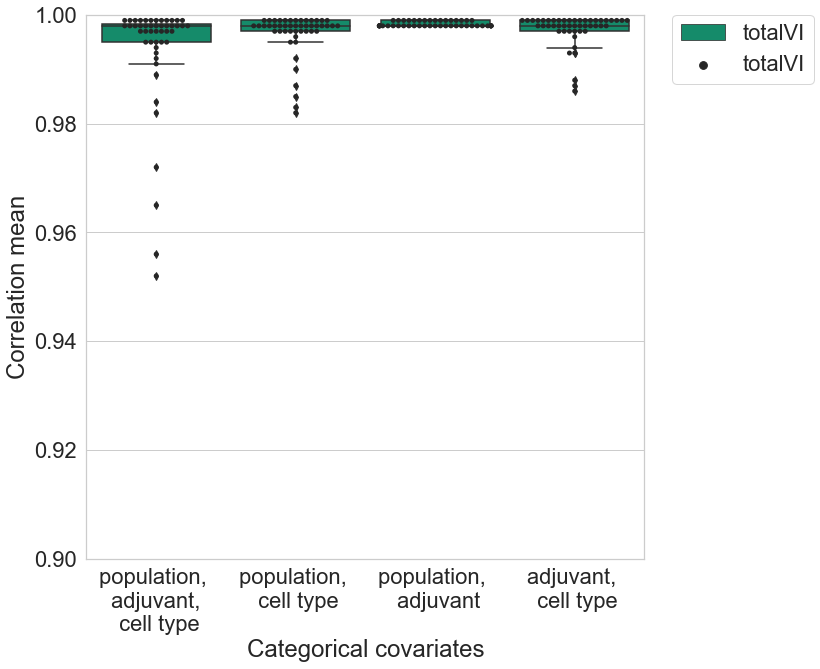

In [38]:
all_boxplot_posterior_PS(MMVI_cat_cov_model_dict, 'protein', label_models, 'corr_mean', title, "Correlation mean", jitter = True, legend = True, y_lim=[0.9, 1])

{'TOTALVI': '20220608-104642', 'MMVAE': '20220608-162535'}
{'TOTALVI': '20220608-211318', 'MMVAE': '20220610-121219'}
{'TOTALVI': '20220608-213657', 'MMVAE': '20220610-131050'}
{'TOTALVI': '20220608-220008', 'MMVAE': '20220610-141006'}


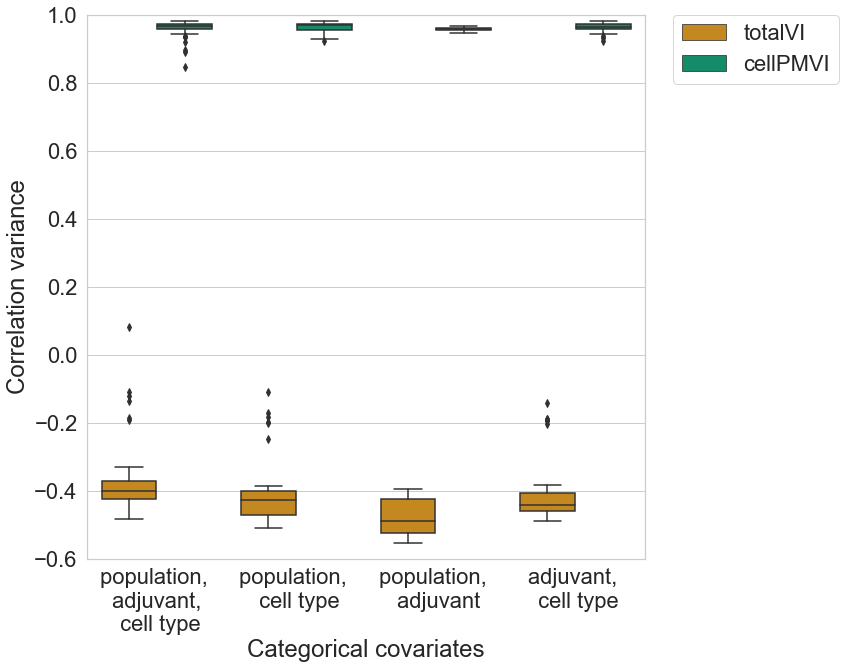

In [36]:
title = 'Training scenario 1 \n Correlation variance of posterior predictive sampling'
all_boxplot_posterior_PS(complete_cat_cov_model_dict, 'protein', label_models, 'corr_var', title,  y_label = "Correlation variance", y_lim =[-0.6,1])